In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("C://Users//arjun//project//data//bicycle_data.csv")

In [4]:
df.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [5]:
df.drop('Fremont Bridge Total', axis = 1, inplace = True)

In [6]:
df['total'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk']

In [7]:
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total
0,10/03/2012 12:00:00 AM,4.0,9.0,13.0
1,10/03/2012 01:00:00 AM,4.0,6.0,10.0
2,10/03/2012 02:00:00 AM,1.0,1.0,2.0
3,10/03/2012 03:00:00 AM,2.0,3.0,5.0
4,10/03/2012 04:00:00 AM,6.0,1.0,7.0


In [8]:
df['hour'] = pd.to_datetime(df['Date']).dt.hour

In [9]:
df['year'] = pd.to_datetime(df['Date']).dt.year

In [10]:
df.dtypes

Date                             object
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
total                           float64
hour                              int64
year                              int64
dtype: object

In [11]:
df_sub = df[df['year'] == 2016]

In [25]:
df_sub['hour'].value_counts()

0     366
1     366
22    366
21    366
20    366
19    366
18    366
17    366
16    366
15    366
14    366
13    366
12    366
11    366
10    366
9     366
8     366
7     366
6     366
5     366
4     366
3     366
2     366
23    366
Name: hour, dtype: int64

In [31]:
busy_time = df_sub.groupby(['hour']).sum('total')
busy_time

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total,year
hour,,,,
0,1708.0,2202.0,3910.0,737856
1,907.0,1118.0,2025.0,737856
2,527.0,738.0,1265.0,737856
3,383.0,398.0,781.0,737856
4,1222.0,1018.0,2240.0,737856
5,6430.0,3724.0,10154.0,737856
6,22317.0,12565.0,34882.0,737856
7,60685.0,28939.0,89624.0,737856
8,77959.0,43479.0,121438.0,737856


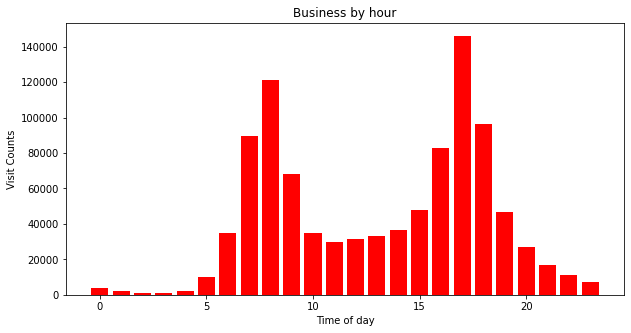

In [33]:
fig = plt.figure(figsize = (10,5))

plt.bar(df_sub['hour'].unique(), busy_time['total'], color = 'red')


plt.xlabel("Time of day")
plt.ylabel("Visit Counts")
plt.title("Business by hour")
plt.show()

## Busiest Time of Day

The busiest hour of the day in 2016 is hour 17, which corresponds to 5 PM.